# Linear Regression Derivation

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [275]:
iris = datasets.load_iris()

Each sample consists of four features: Sepal Length, Sepal Width, Sepal Length and Petal Width.

In [276]:
iris["data"][0]

array([5.1, 3.5, 1.4, 0.2])

In [277]:
feature_names = iris["feature_names"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The samples are labeled with 0, 1 or 2, corresponding to three different varieties of irises: 

In [278]:
np.sort(np.unique(iris["target"]))

array([0, 1, 2])

In [279]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [280]:
iris_df = pd.DataFrame(iris["data"], columns=feature_names)
iris_df["target"] = iris["target"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


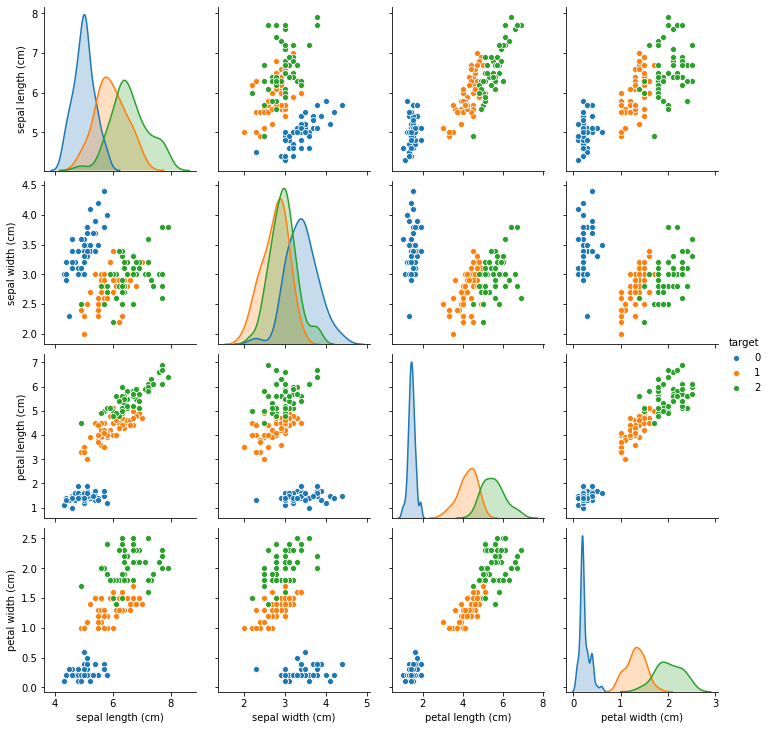

In [281]:
sns.pairplot(iris_df, vars=feature_names, hue="target")
plt.show()

The relationship between petal length and petal width looks linear. Let's fit a regression line to this relationship.

In [282]:
x = iris_df["petal length (cm)"]
y = iris_df["petal width (cm)"]

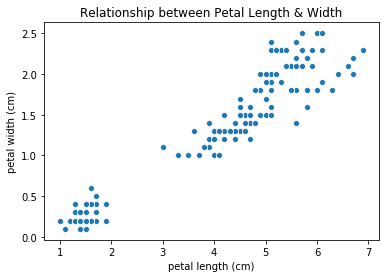

In [283]:
sns.scatterplot(x=x, y=y)
plt.title("Relationship between Petal Length & Width")
plt.show()

In [360]:
class LinReg():
    def __init__(self, lr=0.01, n_iter=500):
        self.lr = lr
        self.n_iter = n_iter
        self.theta = []
        self.costs = []
        
    
    def cost(self, h, y):
        return np.sum((h - y)**2) / (2 * y.size)
        
    def fit(self, x, y):
        x = np.c_[np.ones(x.shape[0]), x] 
        self.theta = np.zeros(x.shape[1])
        self.theta_history = []
        #self.theta_history = [self.theta]
        
        for i in range(n_iter):
            # print(self.theta_history)
            h = np.dot(x, self.theta)
            gradient = (1 / y.size) * np.dot(x.T, (h - y))
            self.theta -= lr * gradient
            self.costs.append(self.cost(h, y))
            self.theta_history.append([self.theta])
            
        return self.theta, self.costs
    
    def plot_fit(self, x, y):
        x_lim = [np.min(x), np.max(x)]
        y_fit = self.theta[0] + np.dot(self.theta[1], x_lim)

        plt.figure(figsize=(10,8))
        plt.title("Linear Regression via Gradient Descent")
        sns.lineplot(x_lim, y_fit)
        sns.scatterplot(x=x, y=y, hue=y, legend=False, palette="Spectral", s=50)
        plt.show()

In [361]:
model = LinReg()
theta, cost = model.fit(x, y)

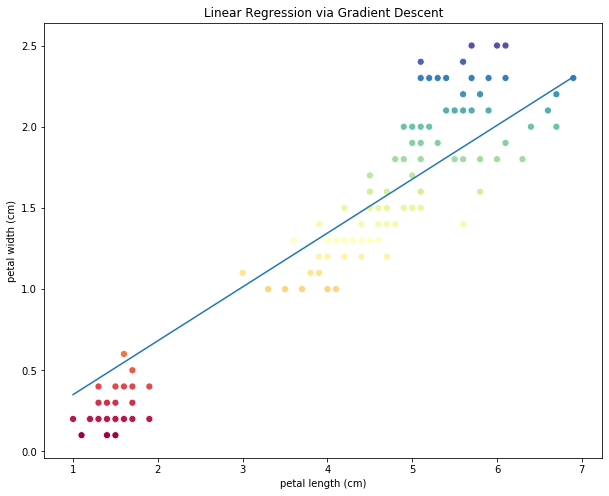

In [362]:
model.plot_fit(x, y)

In [316]:
# https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x, y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    past_thetas = model.theta_history
    print(past_thetas)
    
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    #annotation.set_text('Cost = %.2f e10' % (cost[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.mp4',fps = 30)

[array([0.01818862, 0.3317036 ]), 0.011993333333333342, 0.02168932308000001, 0.029502788286649782, 0.03577368713278761, 0.04078062672611084, 0.04475193484752666, 0.047874733629521854, 0.05030237574973696, 0.05216053864905715, 0.053552218954332174, 0.05456182558071259, 0.055258534170725584, 0.055699036173234844, 0.055929791808826367, 0.05598887645294379, 0.05590749381079266, 0.0557112160165629, 0.05542099993767553, 0.05505402007129856, 0.0546243511318773, 0.054143527455247184, 0.05362100144967085, 0.05306451931233459, 0.052480428942024225, 0.05187393228422246, 0.0512492921366519, 0.050610001633576436, 0.049958923144053105, 0.049298402103857344, 0.04863036030468574, 0.04795637234788648, 0.04727772830093736, 0.046595485046597704, 0.045910508365315086, 0.04522350742321357, 0.04453506303619301, 0.04384565083333587, 0.043155660240120075, 0.04246541003581798, 0.041775161103322495, 0.04108512687806985, 0.04039548191129253, 0.039706368887900426, 0.03901790437787637, 0.038330183549742776, 0.0376

IndexError: invalid index to scalar variable.

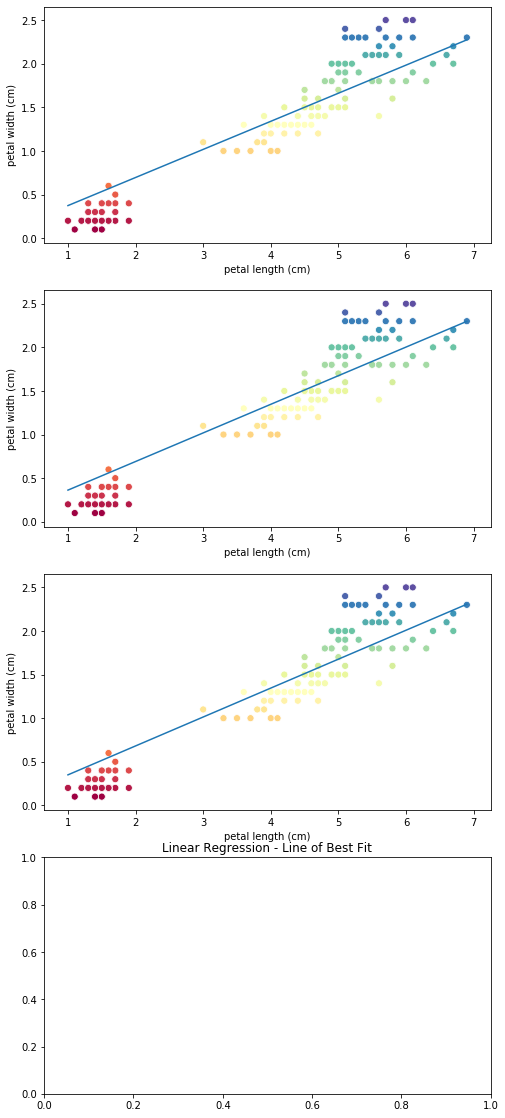

In [246]:
n_iter = [25, 50, 75]

fig, ax = plt.subplots(4,1, figsize=(8,20))

for i, n_iter in enumerate(n_iter):
    model = LinReg(n_iter=n_iter)
    theta = model.fit(x, y)
    
    x_lim = [np.min(x), np.max(x)]
    y_fit = theta[0] + np.dot(theta[1], x_lim)

    plt.title("Linear Regression - Line of Best Fit")
    sns.lineplot(x_lim, y_fit, ax=ax[i])
    sns.scatterplot(x=x, y=y, hue=y, legend=False, palette="Spectral", s=50, ax=ax[i])

plt.show()

In [ ]:
for i in range(n_preview):
    plt.subplot(2, 5, i+1)
    image = train.iloc[i].values.reshape((28,28))
    plt.imshow(image, cmap="Greys")
    plt.axis("off")

plt.suptitle("The First 10 MNIST Handwritten Digits", y=0.9)
plt.show()